✓ Chart saved!
✓ Excel file saved!

VISUALIZATION COMPLETE!
Total topics: 15

Top 5 topics BU SHOULD invest in:
  1. Extraction Processes
     BU: 0, Global: 13,360, Gap: 1.000000
  2. Environmental Sustainability
     BU: 0, Global: 12,790, Gap: 1.000000
  3. Advanced Math & Engineering
     BU: 1, Global: 21,580, Gap: 0.999954
  4. BIM & Construction
     BU: 1, Global: 12,650, Gap: 0.999921
  5. Electric Vehicles
     BU: 2, Global: 12,200, Gap: 0.999836


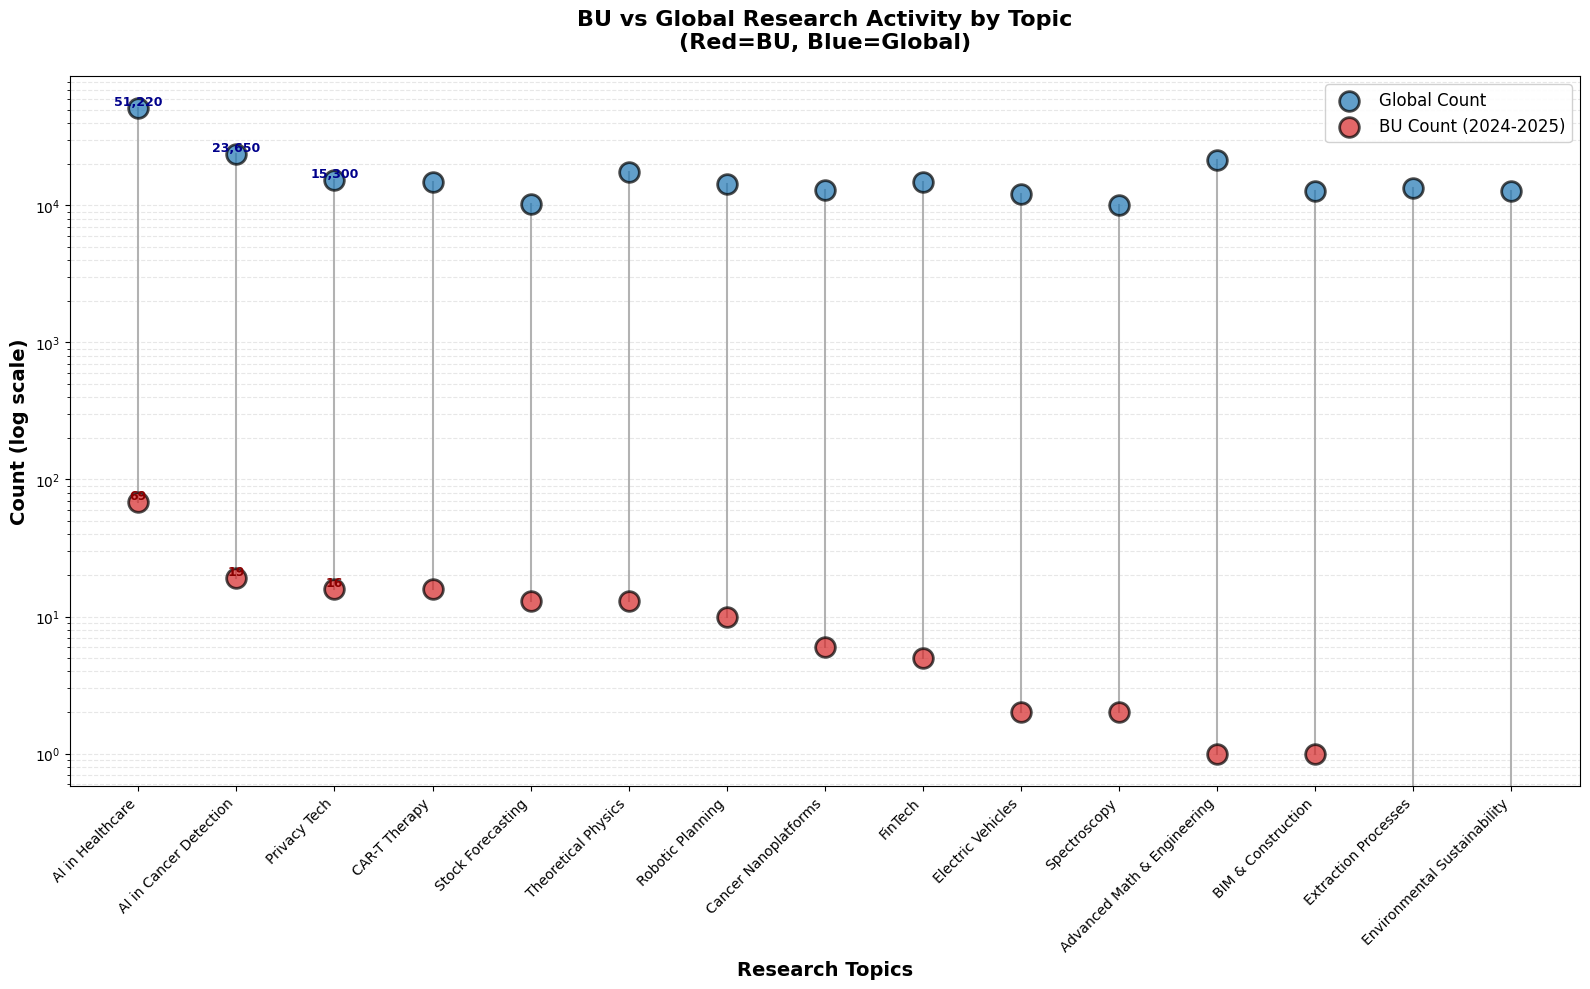

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your data
df = pd.read_csv("data/BU Gap Score.csv")

# Clean the Global_count column (remove commas)
df['Global_count'] = df['Global_count'].astype(str).str.replace(',', '').astype(float)
df['BU_count (2024-2025)'] = pd.to_numeric(df['BU_count (2024-2025)'], errors='coerce')

# ============================================================================
# CUSTOMIZE YOUR TOPIC NAMES HERE!
# ============================================================================
# Map original topic names to shorter custom names
topic_names = {
    "Artificial Intelligence in Healthcare / Artificial Intelligence in Healthcare and Education / Explainable Artificial Intelligence (XAI)": "AI in Healthcare",
    "AI in Service Interactions / AI in cancer detection": "AI in Cancer Detection",
    "Advanced Mathematical Modeling in Engineering / Advanced Nanomaterials in Catalysis / Spectral Theory in Mathematical Physics / advanced mathematical theories": "Advanced Math & Engineering",
    "Privacy-Preserving Technologies in Data": "Privacy Tech",
    "CAR-T cell therapy research": "CAR-T Therapy",
    "FinTech, Crowdfunding, Digital Finance": "FinTech",
    "Robotic Path Planning Algorithms": "Robotic Planning",
    "Extraction and Separation Processes": "Extraction Processes",
    "Electric Vehicles and Infrastructure": "Electric Vehicles",
    "Nanoplatforms for cancer theranostics": "Cancer Nanoplatforms",
    "Environmental Sustainability in Business": "Environmental Sustainability",
    "BIM and Construction Integration": "BIM & Construction",
    "Stock Market Forecasting Methods": "Stock Forecasting",
    "Black Holes and Theoretical Physics / Cold Atom Physics and Bose-Einstein Condensates / Physics of Superconductivity and Magnetism": "Theoretical Physics",
    "Spectroscopy and Chemometric Analyses": "Spectroscopy"
}

# Apply custom names (or use auto-shortened version if not in dictionary)
def get_short_name(full_name):
    if full_name in topic_names:
        return topic_names[full_name]
    else:
        # Fallback: use first part before "/" and limit to 30 chars
        return full_name.split('/')[0].strip()[:30]

df['Topic_Short'] = df['Primary Topic Id'].apply(get_short_name)
# ============================================================================

# Sort by BU count (highest first) for better visualization
df = df.sort_values('BU_count (2024-2025)', ascending=False).reset_index(drop=True)

# Create figure
fig, ax = plt.subplots(figsize=(16, 10))

# X positions for each topic
x_positions = np.arange(len(df))

# Plot Global counts (blue)
ax.scatter(x_positions, df['Global_count'], 
           color='#1f77b4', s=200, alpha=0.7, 
           label='Global Count', marker='o', edgecolor='black', linewidth=2, zorder=3)

# Plot BU counts (red)
ax.scatter(x_positions, df['BU_count (2024-2025)'], 
           color='#d62728', s=200, alpha=0.7, 
           label='BU Count (2024-2025)', marker='o', edgecolor='black', linewidth=2, zorder=3)

# Connect the dots with lines to show the gap
for i in range(len(df)):
    ax.plot([i, i], [df.iloc[i]['BU_count (2024-2025)'], df.iloc[i]['Global_count']], 
            'k-', alpha=0.3, linewidth=1.5, zorder=1)

# Use log scale for y-axis since the difference is huge
ax.set_yscale('log')

# Set x-axis labels
ax.set_xticks(x_positions)
ax.set_xticklabels(df['Topic_Short'], rotation=45, ha='right', fontsize=10)

# Labels and title
ax.set_xlabel('Research Topics', fontsize=14, fontweight='bold')
ax.set_ylabel('Count (log scale)', fontsize=14, fontweight='bold')
ax.set_title('BU vs Global Research Activity by Topic\n(Red=BU, Blue=Global)', 
             fontsize=16, fontweight='bold', pad=20)

# Grid
ax.grid(True, alpha=0.3, linestyle='--', axis='y', which='both')

# Legend
ax.legend(loc='upper right', fontsize=12, framealpha=0.9)

# Add text annotations for exact values on top topics
for i in range(min(3, len(df))):  # Annotate top 3
    # BU count annotation
    ax.text(i, df.iloc[i]['BU_count (2024-2025)'], 
            f"{int(df.iloc[i]['BU_count (2024-2025)'])}",
            ha='center', va='bottom', fontsize=9, color='darkred', fontweight='bold')
    # Global count annotation
    ax.text(i, df.iloc[i]['Global_count'], 
            f"{int(df.iloc[i]['Global_count']):,}",
            ha='center', va='bottom', fontsize=9, color='darkblue', fontweight='bold')

plt.tight_layout()
plt.savefig('bu_vs_global_by_topic.png', dpi=300, bbox_inches='tight')
print("✓ Chart saved!")

# Also create the data in Excel format
from openpyxl import Workbook
from openpyxl.chart import ScatterChart, Reference, Series
from openpyxl.styles import Font, PatternFill, Alignment

wb = Workbook()
ws = wb.active
ws.title = "BU vs Global"

# Headers
headers = ['Topic', 'BU Count (2024-2025)', 'Global Count', 'Gap Score']
ws.append(headers)

# Style headers
for cell in ws[1]:
    cell.font = Font(bold=True, size=12)
    cell.fill = PatternFill(start_color="366092", end_color="366092", fill_type="solid")
    cell.font = Font(bold=True, size=12, color="FFFFFF")
    cell.alignment = Alignment(horizontal='center')

# Add data
for idx, row in df.iterrows():
    ws.append([
        row['Primary Topic Id'],
        row['BU_count (2024-2025)'],
        row['Global_count'],
        row['Gap Score']
    ])

# Adjust column widths
ws.column_dimensions['A'].width = 60
ws.column_dimensions['B'].width = 20
ws.column_dimensions['C'].width = 20
ws.column_dimensions['D'].width = 15

# Color code BU counts (red gradient)
red_fill = PatternFill(start_color="FFE6E6", end_color="FFE6E6", fill_type="solid")
for row in range(2, len(df) + 2):
    ws[f'B{row}'].fill = red_fill

# Color code Global counts (blue gradient)
blue_fill = PatternFill(start_color="E6F2FF", end_color="E6F2FF", fill_type="solid")
for row in range(2, len(df) + 2):
    ws[f'C{row}'].fill = blue_fill

# Save Excel file
wb.save('bu_vs_global_data.xlsx')
print("✓ Excel file saved!")

print("\n" + "="*80)
print("VISUALIZATION COMPLETE!")
print("="*80)
print(f"Total topics: {len(df)}")


# Find top opportunities: high global activity + low BU activity
df_sorted_opportunity = df.sort_values('Gap Score', ascending=False).reset_index(drop=True)
opportunities = df_sorted_opportunity[df_sorted_opportunity['BU_count (2024-2025)'] < 5].head(5)

print(f"\nTop {len(opportunities)} topics BU SHOULD invest in:")
for idx, (i, row) in enumerate(opportunities.iterrows(), 1):
    print(f"  {idx}. {row['Topic_Short']}")
    print(f"     BU: {int(row['BU_count (2024-2025)'])}, Global: {int(row['Global_count']):,}, Gap: {row['Gap Score']:.6f}")
